## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline


In [3]:
# Import ".json" file for the U.S. 

country_geo = r'C:\Users\Leeza\Desktop\Data Analytics\Data Immersion\6. Advanced analytics and dashboard Designs\Balanced flight cancellation and delay - 2019-2023\us-states.json'

In [4]:
# Read the JSON file contents here:

f = open(country_geo)
# returns JSON object asa dictionary
data_json = json.load(f)
  
# Iterating through the json list
for i in data_json['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [5]:
# Define Path
path = r'C:\Users\Leeza\Desktop\Data Analytics\Data Immersion\6. Advanced analytics and dashboard Designs\Balanced flight cancellation and delay - 2019-2023'

In [6]:
# Reading Data
df = pd.read_pickle(os.path.join(path, 'Prepared Data', 'flight_info.pkl'))

In [7]:
df.shape

(1551842, 20)

## Data Wrangling

### Json file state data is not extracted here as my data set already has coordinates

In [8]:
# Dropping the columns which are not needed
columns_to_drop = ['DEP_TIME', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'ARR_TIME', 'CANCELLATION_CODE', 'DIVERTED']

df.drop(columns=columns_to_drop, inplace=True)

In [9]:
df.head()

,FL_DATE,AIRLINE,FL_NUMBER,ORIGIN,DEST,DEP_DELAY,ARR_DELAY,CANCELLED,DISTANCE,DELAY_DUE_WEATHER,latitude,longitude
0,2019-12-06,United Air Lines Inc.,729,DFW,ORD,NaN,NaN,1.0,801.0,NaN,32.896519,-97.046524
1,2019-12-06,United Air Lines Inc.,586,ORD,DFW,NaN,NaN,1.0,801.0,NaN,41.978081,-87.909180
2,2019-12-06,United Air Lines Inc.,362,HNL,EWR,NaN,NaN,1.0,4962.0,NaN,21.320404,-157.917313
3,2019-12-06,United Air Lines Inc.,211,ORD,SFO,NaN,NaN,1.0,1846.0,NaN,41.978081,-87.909180
4,2019-12-04,United Air Lines Inc.,240,EWR,LAX,NaN,NaN,1.0,2454.0,NaN,40.689064,-74.177254


### Data Consistency check

In [10]:
# Duplicate values
df_dups = df[df.duplicated()]
df_dups

,FL_DATE,AIRLINE,FL_NUMBER,ORIGIN,DEST,DEP_DELAY,ARR_DELAY,CANCELLED,DISTANCE,DELAY_DUE_WEATHER,latitude,longitude


In [11]:
# Missing values
df.isnull().sum()

FL_DATE                    0
AIRLINE                    0
FL_NUMBER                  0
ORIGIN                     0
DEST                       0
DEP_DELAY             761021
ARR_DELAY             777701
CANCELLED                  0
DISTANCE                   0
DELAY_DUE_WEATHER    1409820
latitude                  22
longitude                 22
dtype: int64

In [12]:
# Imputing missing values
df['ARR_DELAY'].fillna(0, inplace=True)
df['DELAY_DUE_WEATHER'].fillna(0, inplace=True)
df['DEP_DELAY'].fillna(0, inplace=True)
df['latitude'].fillna(0, inplace=True)
df['longitude'].fillna(0, inplace=True)

In [13]:
df.isnull().sum()

FL_DATE              0
AIRLINE              0
FL_NUMBER            0
ORIGIN               0
DEST                 0
DEP_DELAY            0
ARR_DELAY            0
CANCELLED            0
DISTANCE             0
DELAY_DUE_WEATHER    0
latitude             0
longitude            0
dtype: int64

In [14]:
df.shape

(1551842, 12)

### Extreme values checks

<Axes: xlabel='DEP_DELAY', ylabel='Count'>

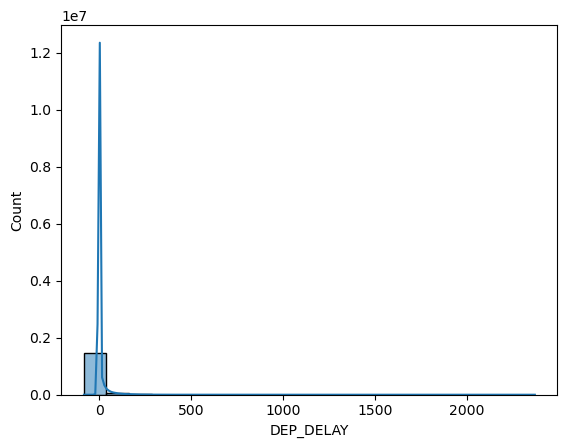

In [15]:
# shows extreme values for 'Departure delay'
sns.histplot(df['DEP_DELAY'], bins=20, kde = True) 

In [16]:
# Finding extreme values percentage for dep_delay
delay_column = "DEP_DELAY"  
delay_threshold = 100  
df["cumulative_delay_over_threshold"] = (df['DEP_DELAY'] >= delay_threshold).cumsum()
total_flights = len(df)
percentage_over_threshold = (df["cumulative_delay_over_threshold"].iloc[-1] / total_flights) * 100
print(f"{percentage_over_threshold:.2f}% of flights experienced delays exceeding {delay_threshold} minutes.")

1.82% of flights experienced delays exceeding 100 minutes.


In [16]:
df.columns

Index(['FL_DATE', 'AIRLINE', 'FL_NUMBER', 'ORIGIN', 'DEST', 'DEP_DELAY',
       'ARR_DELAY', 'CANCELLED', 'DISTANCE', 'DELAY_DUE_WEATHER', 'latitude',
       'longitude'],
      dtype='object')

In [20]:
# Clean extreme values in 'DEP_DELAY' as only 1.8 % made the outliers

df = df[df['DEP_DELAY'] < 100]

In [22]:
df.shape

(1523603, 12)

#### The histogram clearly shows a right-skewed distribution, meaning most flights experience minimal delays, while a smaller portion experiences longer delays.

<Axes: xlabel='ARR_DELAY', ylabel='Count'>

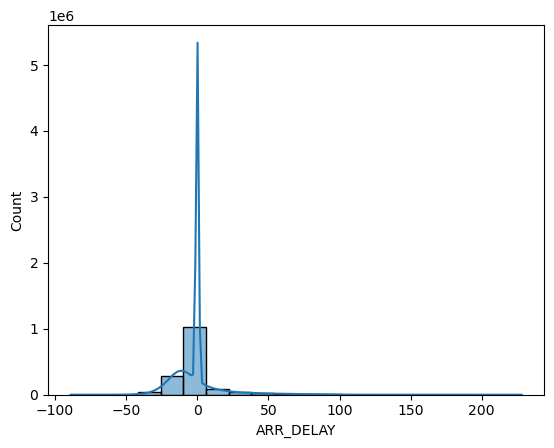

In [23]:
# shows extreme values for 'Arrival delay'
sns.histplot(df['ARR_DELAY'], bins=20, kde = True) 

In [24]:
# Finding extreme values percentage for ARR_DELAY
delay_column = "ARR_DELAY"  
delay_threshold = 250  
df["cumulative_delay_over_threshold"] = (df['ARR_DELAY'] >= delay_threshold).cumsum()
total_flights = len(df)
percentage_over_threshold = (df["cumulative_delay_over_threshold"].iloc[-1] / total_flights) * 100
print(f"{percentage_over_threshold:.2f}% of flights experienced delays exceeding {delay_threshold} minutes.")

0.00% of flights experienced delays exceeding 250 minutes.


####  Arrival delay (arr_delay) distribution is more similar to the departure delay (dep_delay) distribution in terms of shape (right-skewed), even though more flights experience minimal arrival delays compared to minimal departure delays.

<Axes: xlabel='DELAY_DUE_WEATHER', ylabel='Count'>

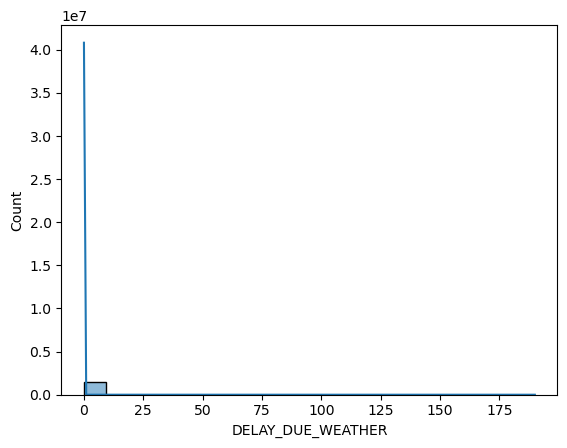

In [25]:
# shows extreme values for 'DELAY_DUE_WEATHER'
sns.histplot(df['DELAY_DUE_WEATHER'], bins=20, kde = True) 

In [26]:
# Finding extreme values percentage for DELAY_DUE_WEATHER
delay_column = "DELAY_DUE_WEATHER"  
delay_threshold = 150  
df["cumulative_delay_over_threshold"] = (df['DELAY_DUE_WEATHER'] >= delay_threshold).cumsum()
total_flights = len(df)
percentage_over_threshold = (df["cumulative_delay_over_threshold"].iloc[-1] / total_flights) * 100
print(f"{percentage_over_threshold:.2f}% of flights experienced delays exceeding {delay_threshold} minutes.")

0.00% of flights experienced delays exceeding 150 minutes.


## Plotting a Choropleth

In [27]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [24]:
# Create a data frame with just the DEST and the values for DEP_DELAY we want plotted

data_to_plot = df[['DEST','DEP_DELAY']]
data_to_plot.tail()

,DEST,DEP_DELAY
1551837,SMF,0.0
1551838,BQK,-3.0
1551839,ATL,0.0
1551840,EWR,-9.0
1551841,ATL,26.0


In [25]:
df.drop(columns=['cumulative_delay_over_threshold'], inplace=True)

In [26]:
df.dtypes

FL_DATE              datetime64[ns]
AIRLINE                      object
FL_NUMBER                     int32
ORIGIN                       object
DEST                         object
DEP_DELAY                   float32
ARR_DELAY                   float32
CANCELLED                   float16
DISTANCE                    float32
DELAY_DUE_WEATHER           float32
latitude                    float32
longitude                   float32
dtype: object

In [ ]:
# Calculate the mean latitude and longitude
center_latitude = df['latitude'].mean()
center_longitude = df['longitude'].mean()

# Create a Folium map with a high-level zoom
map = folium.Map(location=[center_latitude, center_longitude], zoom_start=1.5)

# Add a marker for each row in the DataFrame
for index, row in df.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], popup=f"{row['DEST']} - DEP_DELAY: {row['DEP_DELAY']}").add_to(map)

# Display the map
map

In [ ]:
# Save the map as an HTML file
map.save("my_map.html")